In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


# Cтандартизация данных

Приёмы стандартизации данных:
- Логарифмирование
- Нормализация

## Логарифмирование данных

Рассмотрим один из наборов данных, идущих с пакетом R ([описание](https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/SpeciesArea.html)),
который содержит подсчеты числа
видов млекопитающих на разных островах в Юго-Восточной Азии.

- Name 	Название острова
- Area 	Площадь (км2)
- Species 	Количество видов млекопитающих
- logArea 	логарифм Area
- logSpecies 	логарифм Species


Первоисточник

- Heaney, Lawrence R. (1984) Mammalian species richness on islands on the Sunda Shelf, Southeast Asia, Oecologia. 


In [2]:
D = pd.read_csv('d/SpeciesArea.csv', index_col=0)
D

,Name,Area,Species,logArea,logSpecies
1,Borneo,743244,129,13.51880,4.85981
2,Sumatra,473607,126,13.06810,4.83628
3,Java,125628,78,11.74110,4.35671
4,Bangka,11964,38,9.38966,3.63759
5,Bunguran,1594,24,7.37400,3.17805
6,Banggi,450,18,6.10925,2.89037
7,Jemaja,194,15,5.26786,2.70805
8,Karimata Besar,130,19,4.86753,2.94444
9,Tioman,114,23,4.73620,3.13549
10,Siantan,113,16,4.72739,2.77259


Посмотрим распределение значений.

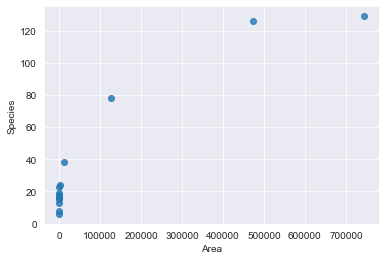

In [4]:
sns.regplot(x='Area', y='Species', data=D, fit_reg=False);

Мы видим прямую зависимость:
больше площадь - больше видов.
При этом график функции замедляет свой рост при высоких значениях площади. 

Чтобы нагляднее отобразить зависимость используются логарифмическая шкала. В данном наборе данных прологарифмированные значения уже включены в набор.


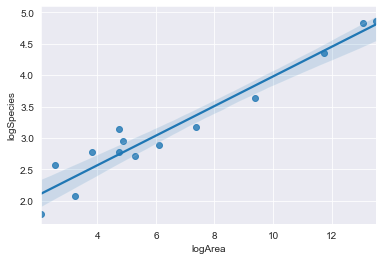

In [5]:
sns.regplot(x='logArea', y='logSpecies', data=D);

В логарифмической шкале облако точек выглядит более равномерным. Точки для крупных островов стали ближе друг к другу, а точки для мелких можно отличить друг от друга.

Логарифмирование помогает тогда, когда в одном наборе данных мы хотим охватить большой диапазон значений, различающихся на порядок и более. Широко известные примеры: показатель кислотности воды pH, громкость звука над порогом слышимости дБ.

Логарифмированные данные в таблице получены логарифмом с основанием $e$. Логарифмирование позволяет получить более равномерное распределение.

Такой же паттерн точек можно получить, если данные не преобразовывать, а только менять шкалу по обеим осям. Обратите внимание на отображение подписей к обеим шкалам.

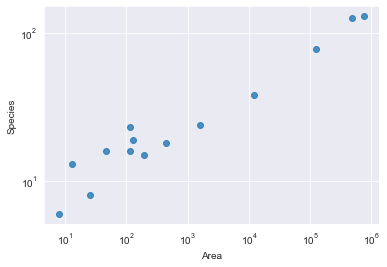

In [6]:
axes().set(xscale="log", yscale="log")
sns.regplot(x='Area', y='Species', data=D, fit_reg=False);

Чтобы рассчитать линейную модель логарифмов данных, их нужно преобразовать до построения рисунка.

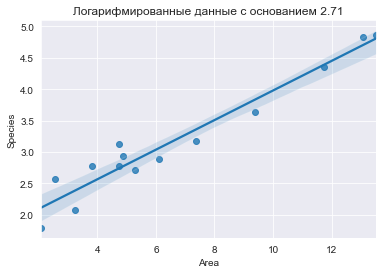

In [36]:
sns.regplot(D.Area.apply(log), D['Species'].apply(log), data=D, fit_reg=True);
title('Логарифмированные данные с основанием 2.71');

Логарифмирование с другим основанием дает другие значения (см. на оси), но такой же паттерн точек.

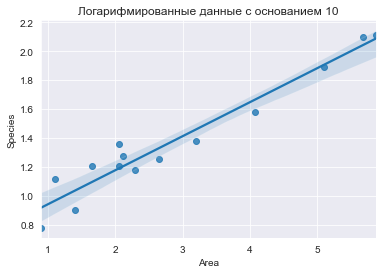

In [37]:
sns.regplot(D.Area.apply(log10), D['Species'].apply(log10));
title('Логарифмированные данные с основанием 10');

:::{seealso}
Википедия знает о кривой ["вид-площадь"](https://en.wikipedia.org/wiki/Species%E2%80%93area_curve).
:::